# <center> Trabajo 2
## <center> **$Solución \ de \ ecuaciones \ diferenciales \ ordinarias$**
<br>  
<center> Juan Diego Alvarez Perdomo <br /> Juliana Carvajal Guerra <br /> Oriana Mejía Cardona

<br>
<br>
<center><img src="https://raw.githubusercontent.com/jda-21/metPy/master/IMG/Escudo%20UDEA.png" width="200"">
<br>
<center> Programación y métodos numéricos <br /> Facultad de Ingeniería <br /> Departamento de Ingeniería Mecánica <br /> Universidad de Antioquia <br /> Medellín
 <center> Enero de 2021

--------------------------------------------------------------
    

## T2. Métodos Numéricos

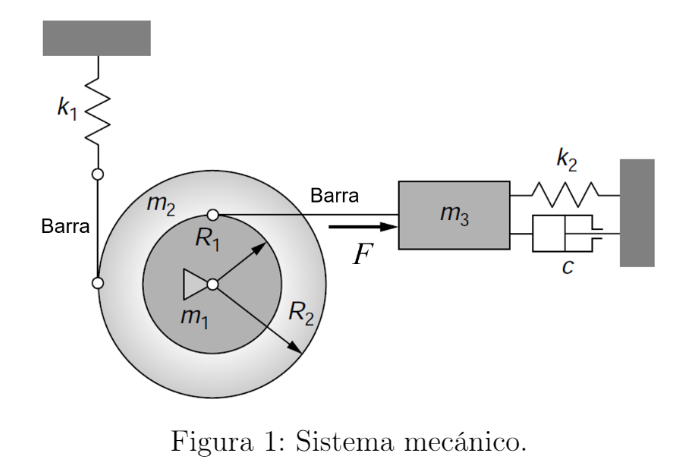

$ \left [ \left ( \frac{1}{2}m1+m3 \right )R^2_1+\frac{1}{2}m_2R^2_2 \right ]\ddot{\theta} + cR^2_1\dot{\theta}+\left( k_1R^2_2+k_2R^2_1 \right) \theta = R_1F  $



## Parámetros del sistema

$m_1 = 0.5 \ kg \ ; m_2 = 1 \ kg \ ; m_3 = 1 \ kg$

$R_1 = 2 cm = 0.02 m \ ; \ R_2 = 4 cm = 0.04 m \ ; F = 0.25 N$

$k_1 = 120 \ \frac{N}{m} ; \ k_2 = 100 \ \frac{N}{m} ;  \ c = 25 \ \frac{N\cdot s}{m}$


In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math

In [56]:
# Parámetros del sistema

m1 = 0.5 # kg
r1 = 0.02 # m
k1 = 120 # N/m

m2 = 1 # kg
r2 = 0.04 # m
k2 = 100 # N/m

m3 = 1 # kg
F = 0.25 # N
c = 25 # Ns/m

#### En cuanto a las constantes, se pueden reescribir de manera tal que:

$ \left [ A \right ] \cdot \ddot{\theta} + B\cdot \dot{\theta}+\left( C \right)\cdot  \theta = D  $

#### En donde,

* $ A = \left [ \left ( \frac{1}{2}m1+m3 \right )R^2_1+\frac{1}{2}m_2R^2_2 \right ] $
* $ B = cR_1^2 $
* $ C = \left( k_1R^2_2+k_2R^2_1 \right) $
* $ D = R_1F $

In [3]:
A = (((1/2) * m1 + m3) * (r1**2) + (1/2) * m2 * (r2**2)) # c1
B = (c * (r1**2)) # c2
C = ((k1 * (r2**2) + k2 * (r1**2))) # c3
D = (r1*F) # ti

print('A =',A,'\n', 'B =',B, '\n','C =',C, '\n','D =',D)

A = 13.0 
 B = 100 
 C = 2320 
 D = 0.5


#### Ahora despejando para la derivada de mayor orden:

$ \ddot{\theta} = \frac{D}{A} - \frac{B\cdot \dot{\theta}}{A} - \frac{C\cdot  \theta}{A}  $

Finalmente se reemplaza $\theta_1 = y_1$ ; $\theta_2 = y_2$

<br>

Con lo cual se tiene un sistema de ecuaciones de primer orden y por consiguiente, se podrá utilizar el método de RK4.

<center><img src="https://raw.githubusercontent.com/jda-21/metPy/master/IMG/Numerical%20Methods%20_page-0001.jpg" width="1200"">

### Condiciones Iniciales

Según el enunciado, posición inicial de los discos $ \left[ 5° \cdot \frac{π}{180} = 0.08727 \ rad  \right] $ por lo cual se tiene: <br>


$ \theta_1 \left( 0 \right ) = y_1 \left( 0 \right ) = -0.08727 \ radianes $ <br>
$ \theta_2 \left ( 0\right ) = y_2 \left ( 0\right ) = 0 $

In [4]:
y1_0 = -0.08727
y2_0 = 0

In [38]:
funct = ['f1','f2','f3']
value = ['C * y[1]','y[2]','D/A - B/A *y[2] - C/A * y[1]']
equations = zip(funct, value)
eqns = dict(equations)
n = len(eqns)

In [39]:
def functions(f1, f2, f3):
    funct = ['f1','f2','f3']
    value = [f1, f2, f3]
    equations = zip(funct, value)
    eqns = dict(equations)
    n = len(eqns)
    
    return eqns, n

In [40]:
functions('C * y[1]','y[2]','D/A - B/A *y[2] - C/A * y[1]')

({'f1': 'C * y[1]', 'f2': 'y[2]', 'f3': 'D/A - B/A *y[2] - C/A * y[1]'}, 3)

In [11]:
# Según función "functions"
n = 3

# Pt.1
Resolver la ecuación diferencial dada entre 0 y 2.5 s, usando un paso temporal de 0.01 s,
mediante el método de Runge–Kutta de cuarto orden (RK4).



In [84]:
tf = 2.5 # Final time / Intervalo de tiempo
dt = 0.01 # Time step / Paso temporal
y = np.zeros((n,1))

y0 = np.array(eval('['+ str([0,y1_0,0]) +']')) 
xsn = np.arange(0,tf+dt,dt)
nx = len(xsn)
ysn = np.zeros((nx,n))
ysn[0,:] = y0[0,:]
ysn[0,:] = y0[0,:]

In [89]:
for i in range(1,nx):   
    y = copy.copy(ysn[i-1,:])
    for j in range(n):
        k1[j] = eval(eqns['f' + str(j + 1)]) 
        k2[j] = eval(eqns['f' + str(j + 1)])  
        k3[j] = eval(eqns['f' + str(j + 1)])
        k4[j] = eval(eqns['f' + str(j + 1)])
        
    for k in range(n):
        y[k] = (ysn[i-1,k]) + 0.5 * k1[k] * h
        y[k] = (ysn[i-1,k]) + 0.5 * k2[k] * h
        y[k] = (ysn[i-1,k]) + k3[k] * h
      
    for j in range(n):
        y[j] = (1/6)*(k1[j] + 2 *( k2[j] + k3[j]) + k4[j])
        ysn[i,j] = (ysn[i-1,j] + y[j]*h)
        
#a = y_sln[:,1]*(180/np.pi)
print ('Ang. equilibriio ', round(z[nx-1],2),' grados [°] para el sistema.')

Ang. equilibriio  1.23  grados [°] para el sistema.


In [42]:
# Test_001
T = 2.5 
H = 0.01  
n = int(round(T/H))
time_points = np.linspace(0, T, n+1)

class ODEsolution:
     
    def __init__(self, f):
        self.f = f
        
    def set_initial_conditions(self, U0):
                 # System of eqns
            U0 = np.asarray(U0)
            self.number_of_eqns = U0.size
            self.U0 = U0
"""        
    def solve(self, time_points):
        self.t = np.asarray(time_points)
        n = self.t.size
        
        self.u = np.zeros((n, self.number_of_eqns))
        
        self.u[0, :] = self.U0
        
        # Integrate
        
        for i in range(n - 1):
            self.i = i
            self.u[i + 1] = self.advance()
            
        return self.u, self.t
    
        def advance(self):
                        
            raise NotImplementedError
"""   
class RK4 (ODEsolution): # RungeKutta 4 method
    def advance(self):
        u, f, i, t = self.u, self.f, self.i, self.t
        dt = t[i + 1] - t[i]
        dt2 = dt / 2
        
        K1 = dt * f(u[i, :], t[i])
        K2 = dt * f(u[i, :] + 0.5 * K1, t[i] + dt2)
        K3 = dt * f(u[i, :] + 0.5 * K2, t[i] + dt2)
        K4 = dt * f(u[i, :] + K3, t[i] + dt)
        
        return u[i, :] + (1/6) * (K1 + 2 * K2 + 2 * K3 + K4)

In [ ]:
"""
def f(u, t):
    return -u

for solver_class in [RK4]:
    solver = solver_class(f)
    solver.set_initial_conditions(1)
    u, t = solver.solve(time_points)
    #plt.plot(t, u, label = solver_class.__name__)
    
# plt.legend()
# plt.show()
"""

In [18]:
"""
def RK4(y, l):

    for i in range(1,l):   
        yi = copy.copy(ysn[i-1,:])
        
        for j in range(n):
            k1[j] = eval(eqns['f'+str(j+1)])
            k2[j] = eval(eqns['f'+str(j+1)]) 
            k3[j]=eval(eqns['f'+str(j+1)])
            k4[j] = eval(eqns['f'+str(j+1)])
            
        for k in range(n):
            y[k] = ((ysn[i-1,k]) + 0.5 * k1[k] * h)
            y[k] = (ysn[i-1,k]) + 0.5 * k2[k] * h
            y[k] = (ysn[i-1,k]) + k3[k]*h     
 
            
        for j in range(n):
            y[j] = (1/6)*(k1[j] + 2*(k2[j] + k3[j]) + k4[j])
            ysn[i,j] = (ysn[i-1,j] + y[j]*h)
            
            result = y[j]
            abc = ysn[i,j]
        
        return result, abc

"""

----------------------------------------

# Pt.2
Graficar la posición de los discos en función del tiempo, y establecer cuánto tarda el sistema en volver al reposo, así como el valor de la posición de equilibrio.

In [81]:
ang = round(a[nx-1], 4)
print ('Posición de equilibrio en', ang, 'grados [°]')

# Tiempo en regresar al reposo
print('Según el resultado de las gráficas, el sistema tarda en volver al reposo 1.8 segundos.')

Posición de equilibrio en 1.2344 grados [°]
Según el resultado de las gráficas, el sistema tarda en volver al reposo 1.8 segundos.


In [68]:
xf = xsn
yf1 = ysn[: , 2]*(180/np.pi)
yf2 = ysn[: , 1]*(180/np.pi)

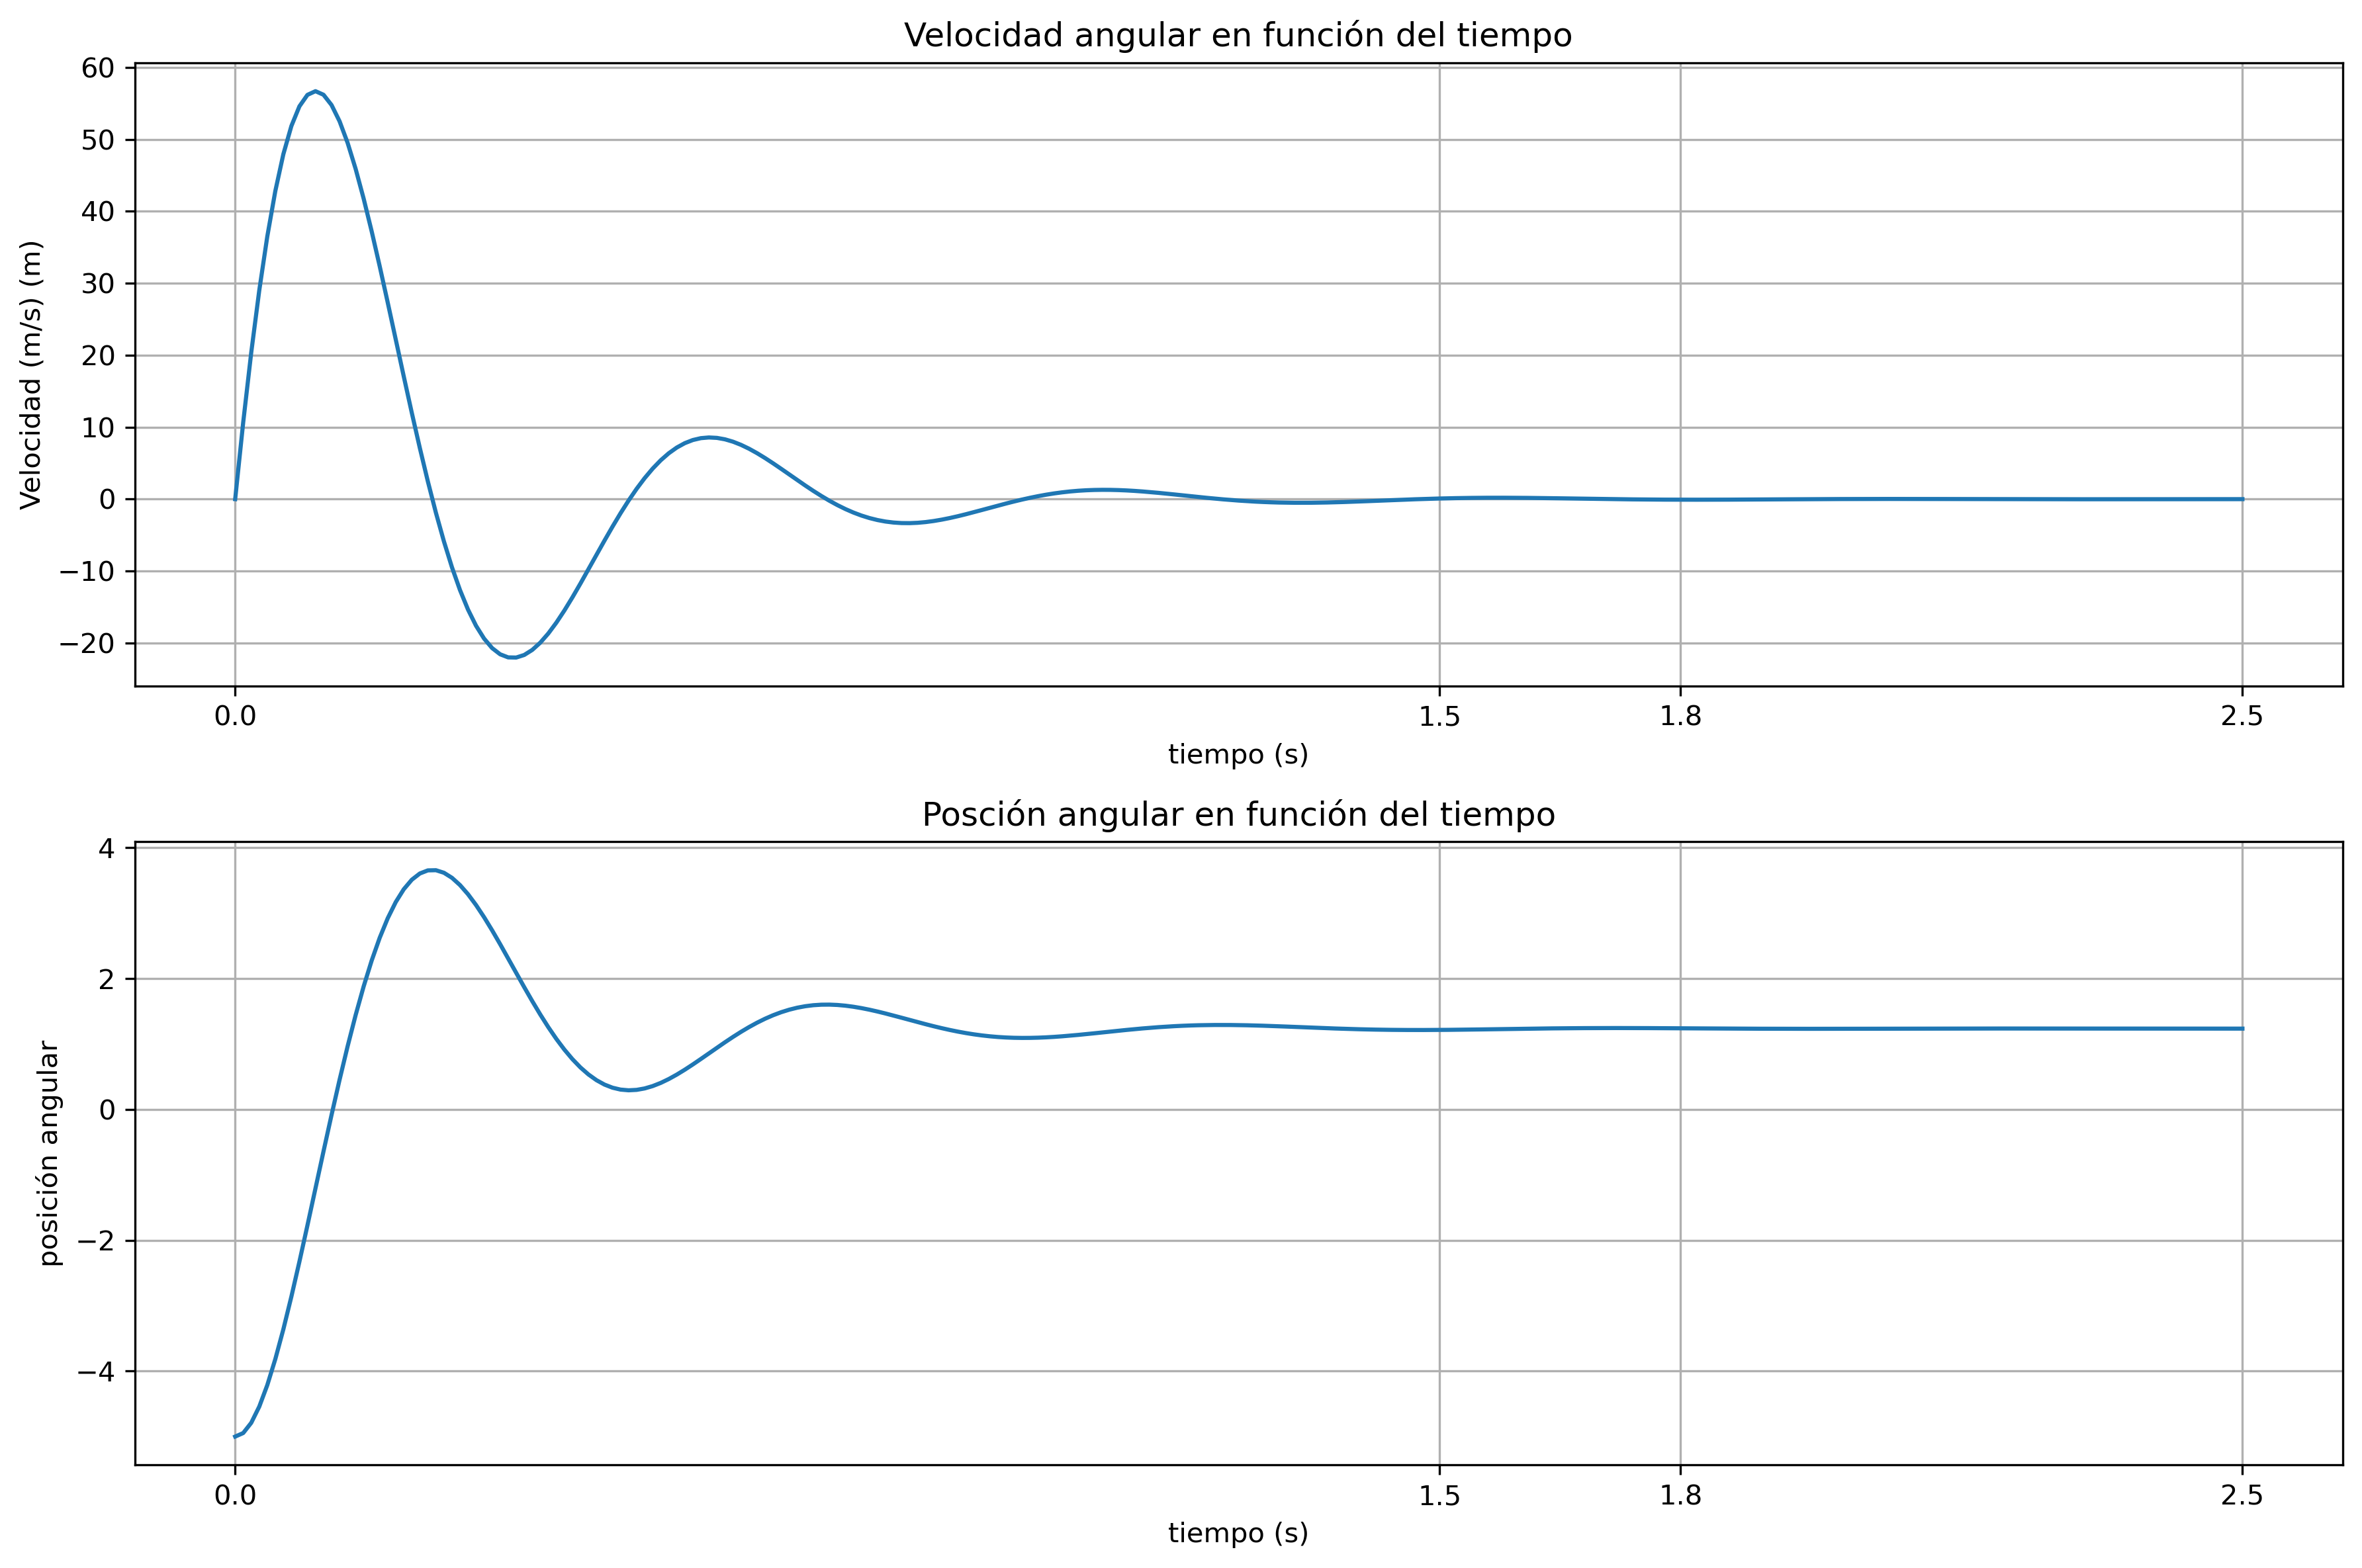

In [70]:
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300 
fig, axs = plt.subplots(2)

axs[0].plot(x_sln,y_sln[:,2]*(180/np.pi)) # Convirtiendo de nuevo a grados
axs[0].set(xlabel='tiempo (s)', ylabel='Velocidad (m/s) (m)',
       title='Velocidad angular en función del tiempo')
axs[0].set_xticks([0, 1.5,1.8, 2.5])
axs[0].grid()

axs[1].plot(x_sln,y_sln[:,1]*(180/np.pi)) # Convirtiendo de nuevo a grados
axs[1].set(xlabel='tiempo (s)', ylabel='posición angular',
       title='Posción angular en función del tiempo')
axs[1].set_xticks([0, 1.5,1.8, 2.5])
axs[1].grid()

fig.tight_layout()

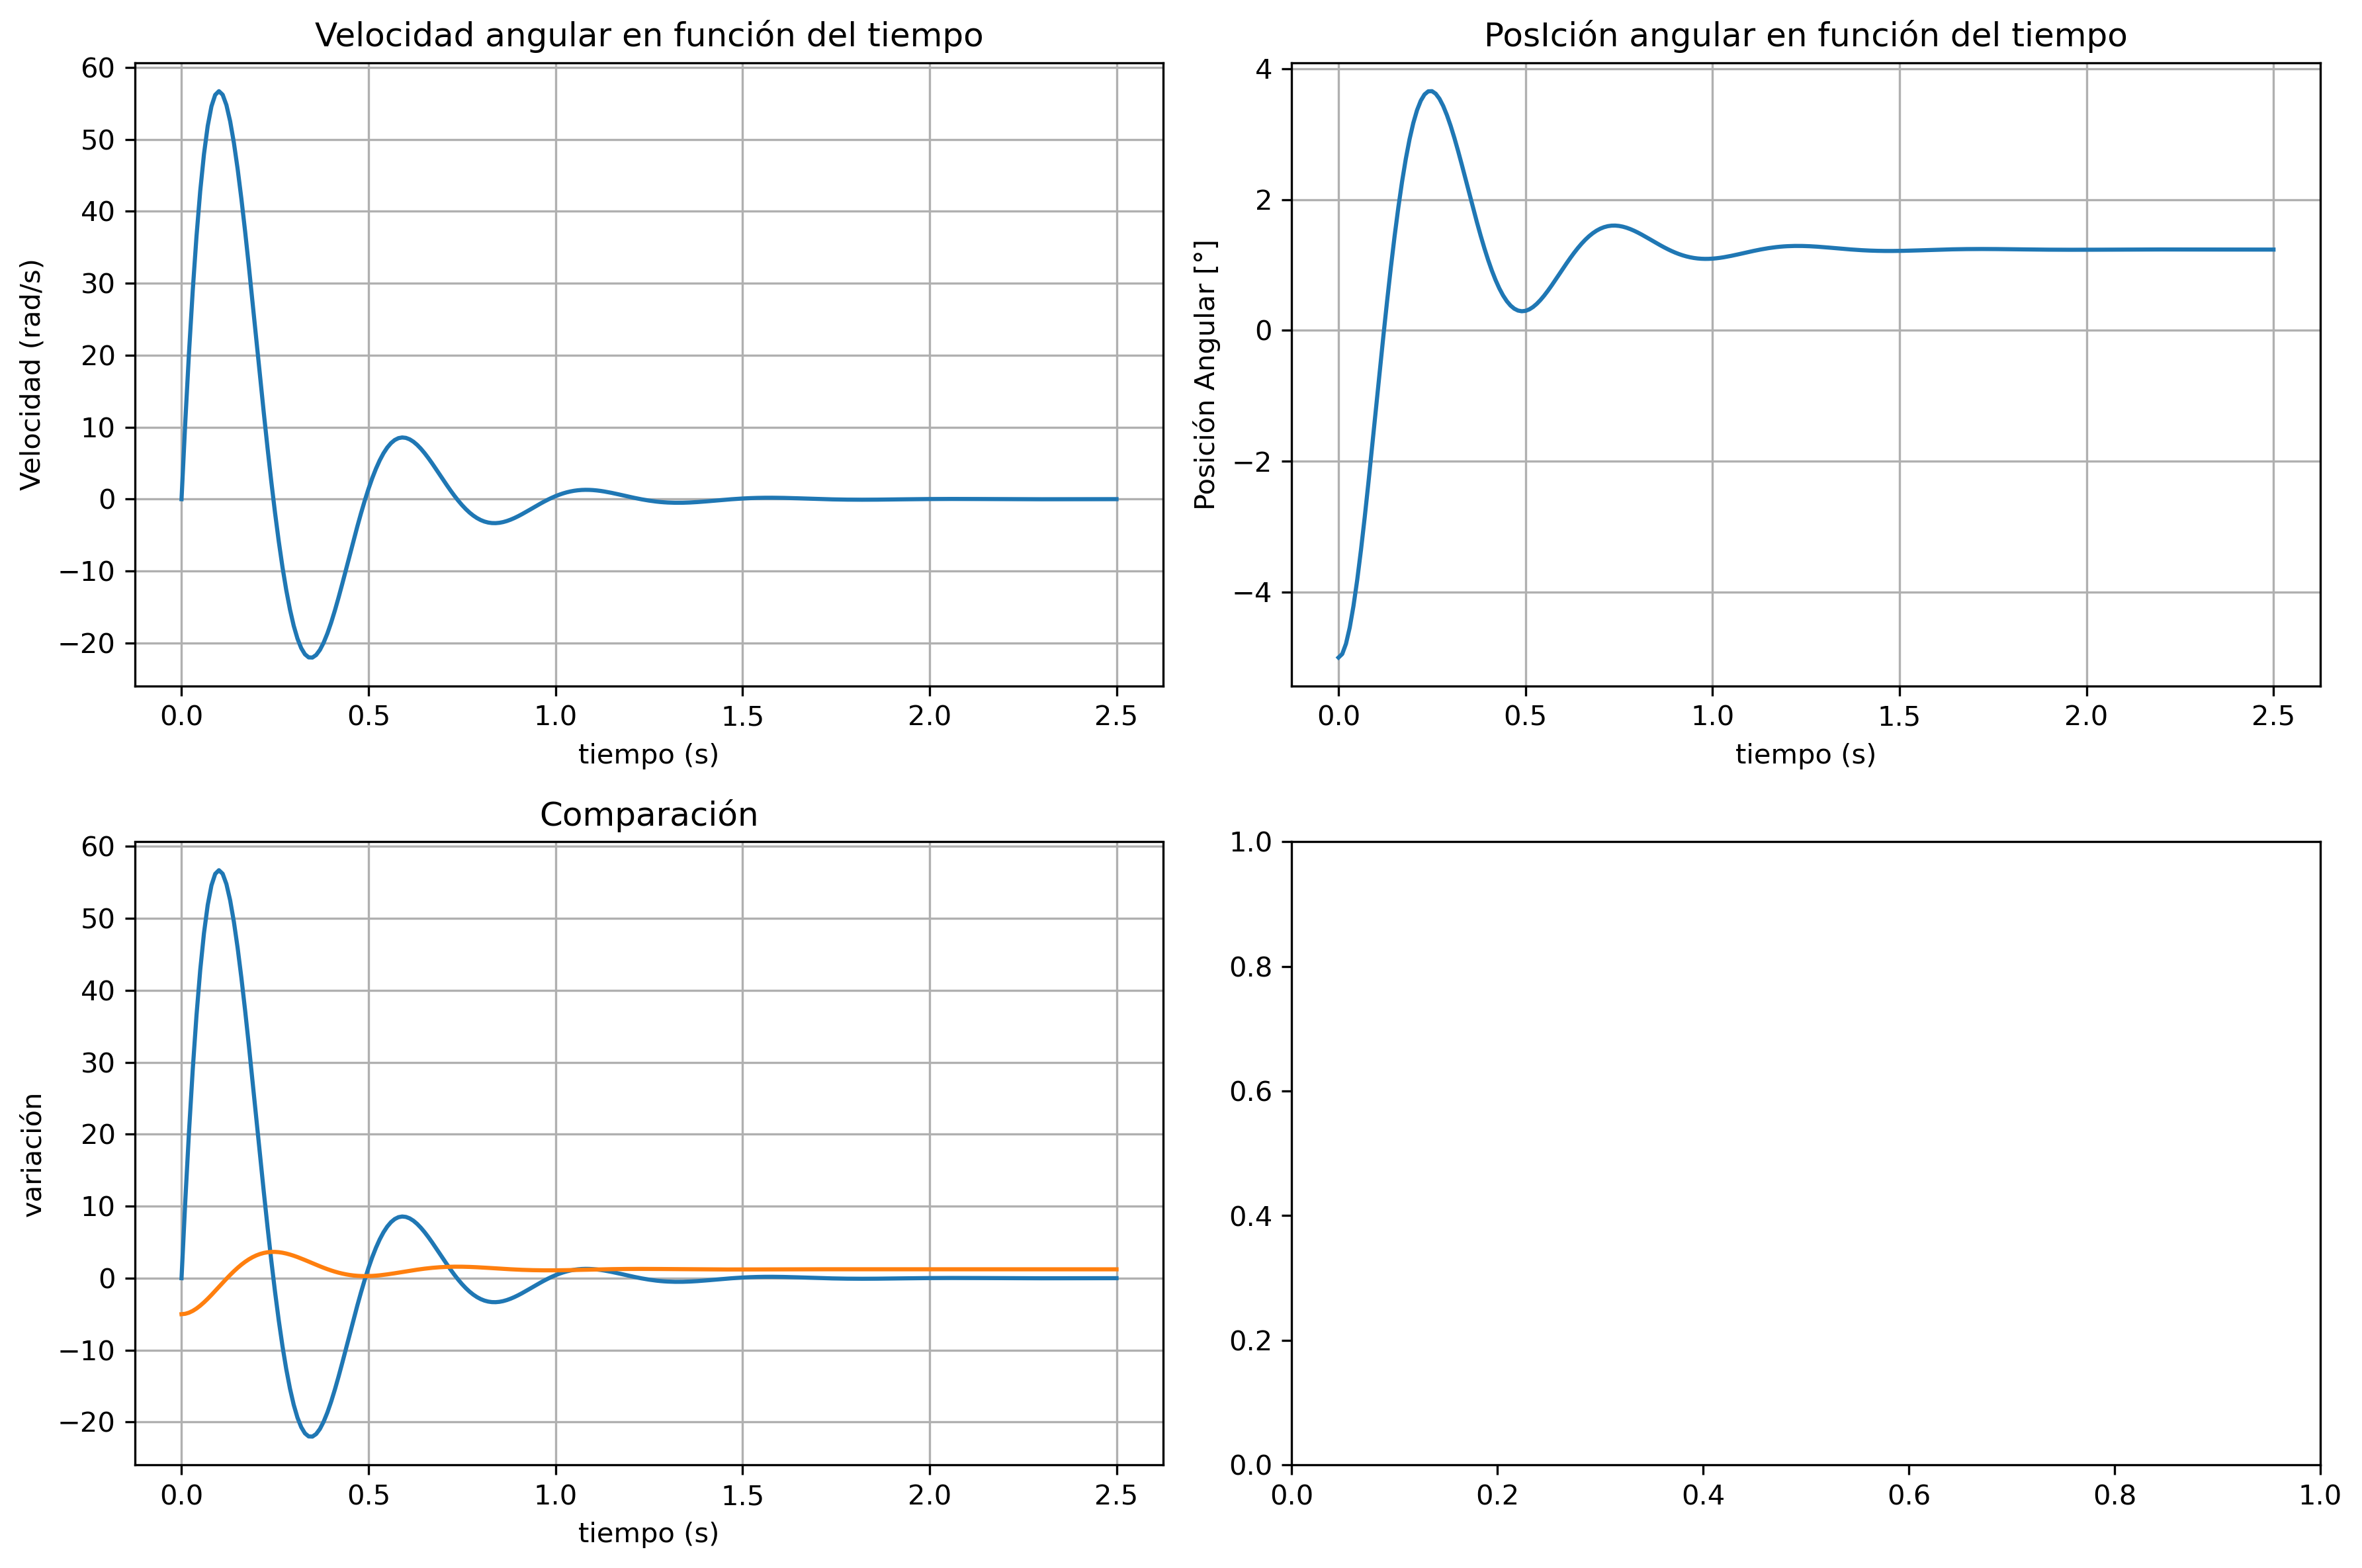

In [69]:
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300 
fig, axs = plt.subplots(2, 2)

#----------------------------------------------------------------------------
axs[0, 0].plot(xf, yf1)
axs[0, 0].set(xlabel='tiempo (s)', 
              ylabel='Velocidad (rad/s)',
       title='Velocidad angular en función del tiempo')
#axs[0, 0].set_xticks([0., 1.5,1.8, 2.5])
axs[0, 0].grid()

#----------------------------------------------------------------------------
axs[0, 1].plot(xf , yf2)
axs[0, 1].set(xlabel='tiempo (s)', 
              ylabel='Posición Angular [°]',
       title='PosIción angular en función del tiempo')
#axs[0, 1].set_xticks([0., 1.5,1.8, 2.5])
axs[0, 1].grid()

#----------------------------------------------------------------------------
axs[1, 0].plot(xf, yf1)
axs[1, 0].plot(xf, yf2)
axs[1, 0].set(xlabel='tiempo (s)', 
              ylabel='variación',
       title='Comparación')
#axs[1, 0].set_xticks([0., 1.5,1.8, 2.5])
axs[1, 0].grid()

fig.tight_layout()

# Conclusiones

1. Según las soluciones y el resultado de las gráficas, se observa que dicho gráfico corresponde a una función de tipo sinusoidal, característica de sistemas como el anteriormente analizado, en los que el amortiguamiento generado por los resortes y el amortiguador permiten que el sistema regrese a estar en equilibrio luego de alguna perturbación. Finalmente se encuentra que su posición de equilibrio corresponde a 1.23° grados.
<br>

2. Por otro lado, se comprueba la eficacia del método RK4 para la solución de EDOs, en donde se logra una resolver de manera sencilla un problema como este, que de otro modo, resultaría complejo de modelar. En términos de ejecución y procesamiento del método, se obtiene la consecución de un código funcional, que no demanda un gran poder de computación y por consiguiente le otorga una notoria versatilidad al momento de ser aplicado al análisis de sistemas semejantes sin la necesidad de un equipo robusto.
<br>
 
3. En cuanto a las gráficas, al superponerse se evidencia que cumplen con los fundamentos teóricos en este tipo de sistemas, en un primer caso, sólo alcanza la amplitud máxima en un punto y luego al pasar varias veces por la posición de equilibrio, se comprueba que es un sistema amortiguado. Además vemos como se corresponde el cambio posición con la velocidad, considerando lo que nos indica el cálculo acerca de el comportamiento que tienen estas variables, en donde al alcanzar velocidades nulas, se tendrá un máximo o mínimo relativo en la función, lo cual efectivamente se tiene en la gráfica.
<br>

4. En vista del comportamiento del sistema según las gráficas, se puede decir que existe un amortiguamiento bastante funcional a razón de que en unas pocas oscilaciones, en un corto período de tiempo, logra volver al equilibrio o reposo que inicialmente había en el sistema.